In [1]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv -O train.csv


--2025-08-15 12:25:21--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2025-08-15 12:25:21 (4.29 MB/s) - ‘train.csv’ saved [60302/60302]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("train.csv")

# Preview data
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
!pip install pandas numpy matplotlib seaborn



In [4]:
# Shape
print("Rows:", df.shape[0], "Columns:", df.shape[1])

# Info
df.info()

# Summary stats
df.describe()

# Missing values
df.isnull().sum()


Rows: 891 Columns: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
# Instead of inplace=True on a slice, reassign directly
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop column normally
# df = df.drop(columns=['Cabin']) # This line is commented out as Cabin column was likely already dropped.

In [9]:
# Instead of inplace=True on a slice, reassign directly
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop column normally
# df = df.drop(columns=['Cabin']) # This line is commented out as Cabin column was likely already dropped.

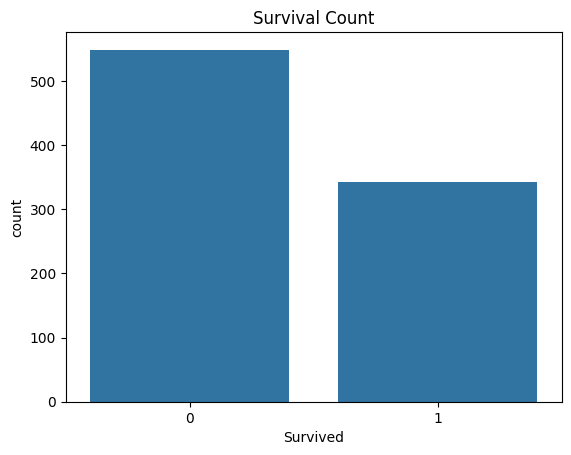

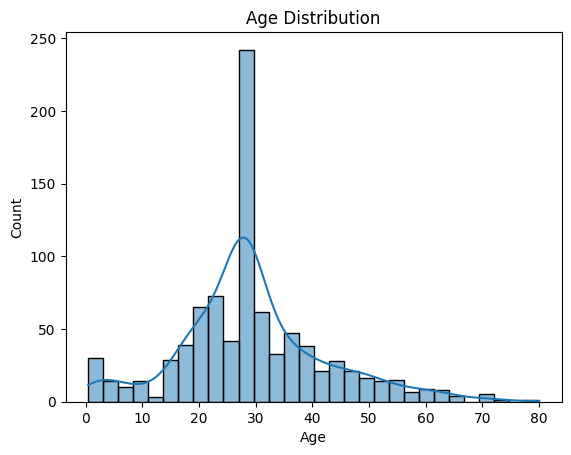

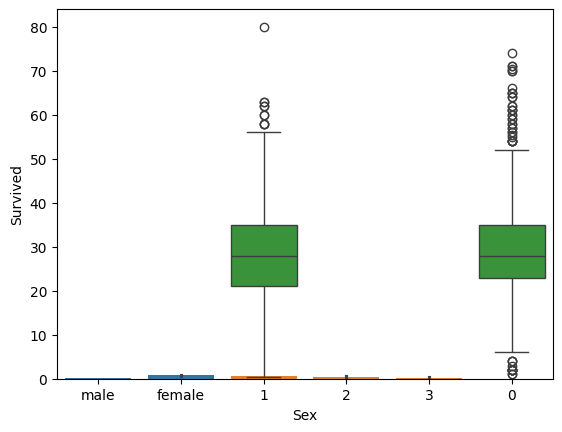

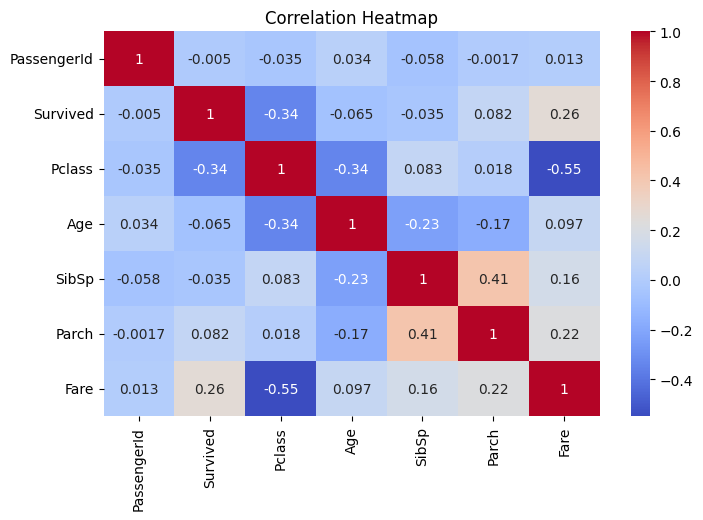

In [10]:
# Univariate
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Bivariate
sns.barplot(x='Sex', y='Survived', data=df)
sns.barplot(x='Pclass', y='Survived', data=df)
sns.boxplot(x='Survived', y='Age', data=df)

# Correlation
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Key Insights from Titanic EDA

1. **Gender and Survival**  
   - Women had a much higher survival rate (~74%) compared to men (~19%).  
   - This shows gender played a strong role in survival.

2. **Passenger Class and Survival**  
   - 1st Class passengers had the highest survival rates (~63%).  
   - 3rd Class passengers had the lowest (~24%).  
   - This suggests wealth and access to lifeboats mattered.

3. **Age and Survival**  
   - Children (age < 15) had better survival chances.  
   - Elderly passengers had lower survival rates.

4. **Embarked Port Influence**  
   - Passengers from port 'C' had a slightly higher chance of survival than those from 'S' or 'Q'.

5. **Correlation Observations**  
   - Survival is strongly correlated with being female and being in a higher class.
